## Лабораторная работа №1. Основы машинного обучения

Перед запуском необходимо скачать файлы notMNIST_large.tar.gz и notMNIST_small.tar.gz, а затем разархивировать их в папку, где находится данный файл.

In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from mypackage import notmnist

Изображения сохраняются в формате pickle для быстрого получения в дальнейшем.

In [2]:
notmnist.save_data_set()

Поврежденное изображение notMNIST_large\A\RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png
Поврежденное изображение notMNIST_large\A\SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png
Поврежденное изображение notMNIST_large\A\Um9tYW5hIEJvbGQucGZi.png
Готово для notMNIST_large\A
Поврежденное изображение notMNIST_large\B\TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png
Готово для notMNIST_large\B
Готово для notMNIST_large\C
Поврежденное изображение notMNIST_large\D\VHJhbnNpdCBCb2xkLnR0Zg==.png
Готово для notMNIST_large\D
Готово для notMNIST_large\E
Готово для notMNIST_large\F
Готово для notMNIST_large\G
Готово для notMNIST_large\H
Готово для notMNIST_large\I
Готово для notMNIST_large\J

Поврежденное изображение notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png
Готово для notMNIST_small\A
Готово для notMNIST_small\B
Готово для notMNIST_small\C
Готово для notMNIST_small\D
Готово для notMNIST_small\E
Поврежденное изображение notMNIST_small\F\Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png
Готово для notMNIS

### Задание 1

Загрузка данных и вывод изображений.

`load_data_set` – загружает данные из папки pickle, полученные ранее

`show_images` – показывает случайное изображение каждого класса

In [3]:
large_data_set = notmnist.load_data_set(notmnist.LARGE_DATA_SET_FOLDER)
small_data_set = notmnist.load_data_set(notmnist.SMALL_DATA_SET_FOLDER)

In [4]:
def show_images(data_set):
    fig, axes = plt.subplots(1, notmnist.NUMBER_OF_CLASSES)
    for class_name, ax in zip(notmnist.CLASSES, axes):
        random_image = random.choice(data_set[class_name])
        ax.imshow(random_image)
        ax.set_title(class_name)
        ax.axis('off')
    plt.show()

Изображения большего набора данных


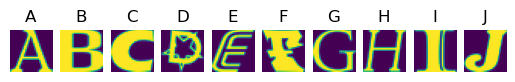

Изображения маленького набора данных


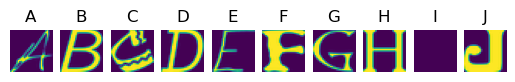

In [5]:
print('Изображения большего набора данных')
show_images(large_data_set)
print('Изображения маленького набора данных')
show_images(small_data_set)

### Задание 2

Вывод количества изображений в каждом классе.

In [6]:
print('Большой набор данных')
for class_name in notmnist.CLASSES:
    print(f'Класс: {class_name}, Количество изображений: {len(large_data_set[class_name])}')
print()
    
print('Маленький набор данных')
for class_name in notmnist.CLASSES:
    print(f'Класс: {class_name}, Количество изображений: {len(small_data_set[class_name])}')

Большой набор данных
Класс: A, Количество изображений: 52909
Класс: B, Количество изображений: 52911
Класс: C, Количество изображений: 52912
Класс: D, Количество изображений: 52911
Класс: E, Количество изображений: 52912
Класс: F, Количество изображений: 52912
Класс: G, Количество изображений: 52912
Класс: H, Количество изображений: 52912
Класс: I, Количество изображений: 52912
Класс: J, Количество изображений: 52911

Маленький набор данных
Класс: A, Количество изображений: 1872
Класс: B, Количество изображений: 1873
Класс: C, Количество изображений: 1873
Класс: D, Количество изображений: 1873
Класс: E, Количество изображений: 1873
Класс: F, Количество изображений: 1872
Класс: G, Количество изображений: 1872
Класс: H, Количество изображений: 1872
Класс: I, Количество изображений: 1872
Класс: J, Количество изображений: 1872


### Задание 3

Получение обучающей, валидационной и контрольной подвыборок.

In [7]:
def get_subset(data_set, size):
    subset = {}
    for class_name, images in data_set.items():
        subset[class_name] = random.sample(images, size // notmnist.NUMBER_OF_CLASSES)
    return subset

In [8]:
random.seed(7)
training_subset = get_subset(large_data_set, 200000)
validation_subset = get_subset(large_data_set, 10000)
control_subset = small_data_set

### Задание 4

Удаление повторяющихся изображений в обучающей подвыборке, которые есть в валидационной и контрольной.

In [9]:
for class_name, images in training_subset.items():
    taken_images = {tuple(image.flatten()) for image in validation_subset[class_name] + control_subset[class_name]}
    training_subset[class_name] = [image for image in images if tuple(image.flatten()) not in taken_images]

### Задание 5

Создание классификатора и графика зависимости точности от размера обучающей выборки.

`get_samples` – формирует матрицу признаков `X` и вектор меток `y` для классификатора `LogarithmicClassifier`

`get_classifier_accuracy` – создает классификатор и возвращает его точность

In [10]:
def get_samples(subset, size=None):
    X = []
    y = []

    for class_name, images in subset.items():
        if size is not None:
            images = images[:size // notmnist.NUMBER_OF_CLASSES]
        X.append([image.flatten() for image in images]) 
        y.extend([class_name] * len(images)) 
        
    X = np.vstack(X)  
    y = np.array(y)
    return X, y

In [11]:
def get_classifier_accuracy(training_size=None):
    X, y = get_samples(training_subset, size=training_size)
    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = scaler.transform(X)

    clf = LogisticRegression(max_iter=1000).fit(X_scaled, y)
    
    control_X, control_y = get_samples(control_subset)
    control_X_scaled = scaler.transform(control_X)
    return clf.score(control_X_scaled, control_y)

In [12]:
get_classifier_accuracy()

0.8973509933774835

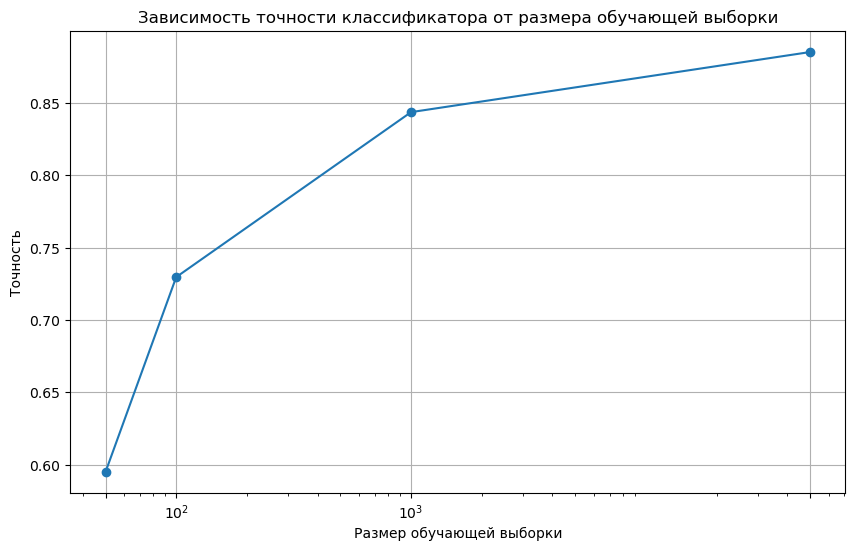

In [13]:
sizes = [50, 100, 1000, 50000]
accuracies = []

for size in sizes:
    accuracies.append(get_classifier_accuracy(size))

plt.figure(figsize=(10, 6))
plt.plot(sizes, accuracies, marker='o')
plt.title('Зависимость точности классификатора от размера обучающей выборки')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Точность')
plt.xscale('log')
plt.xticks(sizes)
plt.grid()
plt.show()